Some insights of the boxoffice evolution in US

In [1]:
import pandas as pd

In [2]:
# import data worldwide (US perspective)
# source: boxofficemojo webscrapping
data = "../data/"
file = "world_bo.csv"

bo_world = pd.read_csv(data + file)
# drop column "Unnamed: 0"
bo_world = bo_world.drop(columns=["Unnamed: 0"])

# check data
bo_world

,Title,Year,Worldwide,Domestic
0,Mission: Impossible II,2000,546388108,215409889.0
1,Gladiator,2000,460583960,187705427.0
2,Cast Away,2000,429632142,233632142.0
3,What Women Want,2000,374111707,182811707.0
4,Dinosaur,2000,349822765,137748063.0
...,...,...,...,...
12495,Jimi Hendrix Electric Church,2019,1818,NaN
12496,Game Day,2019,1624,1624.0
12497,The Hours and Times,2019,1273,1273.0
12498,The Untold Story,2019,790,790.0


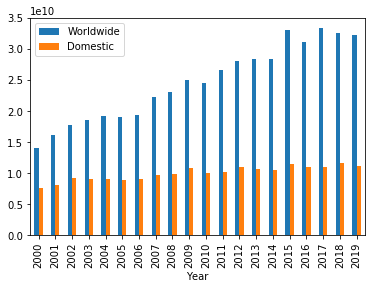

In [12]:
# Check evolution of the box office in the last 20 years
bo_world.groupby("Year").sum().plot.bar();

In [4]:
# create variable
bo_world_yearly = bo_world.groupby("Year").sum()

# calculate the increase
increase = round((bo_world_yearly.iloc[19]["Worldwide"] - bo_world_yearly.iloc[0]["Worldwide"])/bo_world_yearly.iloc[0]["Worldwide"],2)

million = 1000000

# print Worldwide values
print(int(bo_world_yearly.iloc[0]["Worldwide"]/million))
print(int(bo_world_yearly.iloc[19]["Worldwide"]/million))
print(increase*100, "%")

# best year
print(bo_world_yearly["Worldwide"].idxmax(axis=1))
print(int(bo_world_yearly["Worldwide"].max()/million))

14011
32330
131.0 %
2017
33363


In [5]:
# print Domestic (US) values
print(int(bo_world_yearly.iloc[0]["Domestic"]/1000000))
print(int(bo_world_yearly.iloc[19]["Domestic"]/1000000))
print((bo_world_yearly.iloc[19]["Domestic"] - bo_world_yearly.iloc[0]["Domestic"])/bo_world_yearly.iloc[0]["Domestic"])

# best year
print(bo_world_yearly["Domestic"].idxmax(axis=1))
print(int(bo_world_yearly["Domestic"].max()/million))

7680
11170
0.4544923187341323
2018
11570


According to the information fetch from boxoffice mojo, Worldwide the boxoffice value passed from 14,011 Mio USD in the year 200 to 32,330 Mio USD in 2019. An increase of 131%.

Domestically (US) the increase was significant but more modest
7,680 Mio $ to 11.170 Mio USD, increasing a 45%

### How evolves the box office with the inflation with the price of the admissions?
https://www.natoonline.org/data/ticket-price/

In [6]:
file = "us-bo-price-entry.csv"

us_entry = pd.read_csv(data + file)
# subset last 20 years
us_entry = us_entry[us_entry["year"].ge(2000)].sort_values(by="year").set_index("year")
us_entry

,entry,boxoffice
year,,
2000,5.39,7.510
2001,5.65,8.110
2002,5.80,9.090
2003,6.03,9.150
2004,6.21,9.290
2005,6.41,8.820
2006,6.55,9.170
2007,6.88,9.632
2008,7.18,9.634


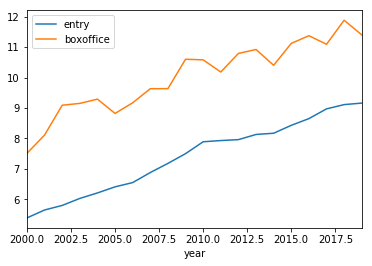

In [7]:
# the source of tickets avg price shows similar (but not exactly the same) value for the domestic box office
# in the next graph we normalize the values to compare entry price and boxoffice
# we can accept this value, since the graph displayed remain similar
us_entry.plot.line();

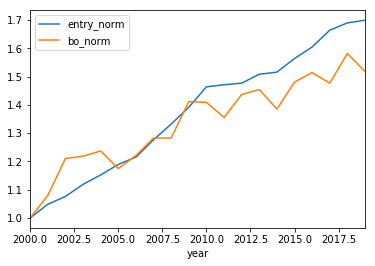

In [8]:
# set base of normalisation
entry_value_2000 = us_entry.iloc[0]["entry"]
bo_value_2000 = us_entry.iloc[0]["boxoffice"]

# add columns of values normalised
us_entry["entry_norm"] = us_entry["entry"].div(entry_value_2000)
us_entry["bo_norm"] = us_entry["boxoffice"].div(bo_value_2000)

# plot graph
us_entry[["entry_norm", "bo_norm"]].plot.line();

the increase of avg ticket value has sustained increased. 
the box office has also a postive trend, however the pace is more erratic
Overall the price entry increased 10 points more than the box-office
Therefore, we can infer: business is growing and at the same time, there is a loss of "customers"

### US Distributors
distinguish different sizes of Distributors, traditionally known as majors

In [9]:
file = "us_bo.csv"

us_bo = pd.read_csv(data + file)
us_bo = us_bo.drop(columns=["Unnamed: 0"])

In [10]:
us_bo.head()

,year,rank,release,gross,max_th,opening,open_th,open,close,distributor
0,2000,1,How the Grinch Stole Christmas,260044825,3256,55082330,3127,Nov 17,Mar 1,Universal Pictures
1,2000,2,Cast Away,233632142,3061,28883406,2774,Dec 22,-,Twentieth Century Fox
2,2000,3,Mission: Impossible II,215409889,3669,57845297,3653,May 24,Oct 19,Paramount Pictures
3,2000,4,Gladiator,187705427,3188,34819017,2938,May 5,May 10,DreamWorks Distribution
4,2000,5,What Women Want,182811707,3092,33614543,3012,Dec 15,-,Paramount Pictures


In [11]:
us_bo.groupby("distributor").sum().sort_values(by="gross", ascending = False).head(15)[["gross"]]

,gross
distributor,
Walt Disney Studios Motion Pictures,34031229934
Warner Bros.,31142200566
Universal Pictures,24010314339
Twentieth Century Fox,22336405974
Sony Pictures Releasing,18360654772
Paramount Pictures,15188915989
Lionsgate,9389932803
DreamWorks,4730766291
New Line Cinema,4356795575
